# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy

# Import API key
from api_keys import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code

    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))

636
636


In [3]:
#Create df to store the data
weather = pd.DataFrame({
                        'City': cities, 
                        'Cloudiness': "", 
                        'Country': countries, 
                        'Date': "",
                        'Humidity': "", 
                        'Lat': "", 
                        'Lng': "", 
                        'Max Temp': "", 
                        'Windspeed': ""})

weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,mount isa,,AU,,,,,,
1,middlebury,,US,,,,,,
2,jamestown,,SH,,,,,,
3,bluff,,NZ,,,,,,
4,aktau,,KZ,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).



In [4]:
#Base url to make the API call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='


print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

for index, location in weather.iterrows(): 
    
    #Create the query url for the API call
    query_url = base_url + location['City'] + ',' + location['Country'] + '&APPID=' + api_key
    
    print(index)
    print(query_url)
    
    #API call
    r = requests.get(query_url)
    
    # get only with status 200 (success status)
    if r.status_code == 200:
        weather.loc[index, 'Cloudiness'] = r.json()['clouds']['all']
        weather.loc[index, 'Date'] = r.json()['dt']
        weather.loc[index, 'Humidity'] = r.json()['main']['humidity']
        weather.loc[index, 'Lat'] = r.json()['coord']['lat']
        weather.loc[index, 'Lng'] = r.json()['coord']['lon']
        weather.loc[index, 'Max Temp'] = r.json()['main']['temp_max']
        weather.loc[index, 'Windspeed'] = r.json()['wind']['speed']

print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


-----------------------------
Beginning Data Retrieval
-----------------------------
0
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=mount isa,AU&APPID=f1a1215cf8619234c58d4236c797ca65
1
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=middlebury,US&APPID=f1a1215cf8619234c58d4236c797ca65
2
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=jamestown,SH&APPID=f1a1215cf8619234c58d4236c797ca65
3
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=bluff,NZ&APPID=f1a1215cf8619234c58d4236c797ca65
4
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=aktau,KZ&APPID=f1a1215cf8619234c58d4236c797ca65
5
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=albany,AU&APPID=f1a1215cf8619234c58d4236c797ca65
6
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=port macquarie,AU&APPID=f1a1215cf8619234c58d4236c797ca65
7
http://api.openweathermap.org/data/2.5/weather?units=imperial&q=la rioja,AR&APPID=f1a1215cf

In [5]:
# drop rows with Nan values
weather['Max Temp'] = weather['Max Temp'].replace('', np.nan)
weather = weather.dropna()

In [6]:
weather.Lat.count()

550

In [7]:
#Save dataframe
weather.to_csv("Output/City_Weather_Data.csv", index=False, header=True)

#Preview the dataframe
weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,mount isa,10,AU,1577167656,11,-20.73,139.49,111.20,18.34
1,middlebury,90,US,1577167656,69,44.01,-73.17,39.00,14.99
2,jamestown,100,SH,1577167656,80,-15.94,-5.72,71.06,20.83
3,bluff,94,NZ,1577167656,62,-46.6,168.33,57.99,8.01
4,aktau,29,KZ,1577167656,69,43.65,51.16,33.80,22.37


#### Latitude vs. Temperature Plot

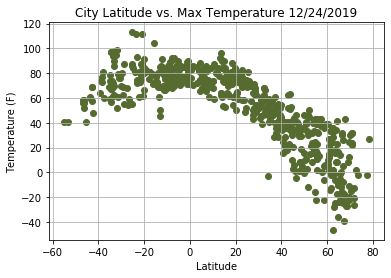

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather["Lat"], weather["Max Temp"], marker="o", color="darkolivegreen")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%m/%d/%Y')}")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude_vs_Temperature.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

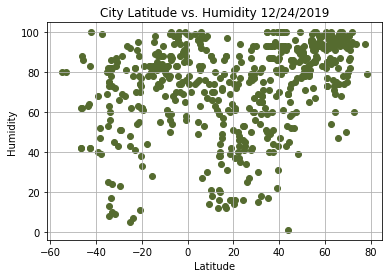

In [9]:
plt.scatter(weather["Lat"], weather["Humidity"], marker="o", color="darkolivegreen")
plt.title(f"City Latitude vs. Humidity {time.strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

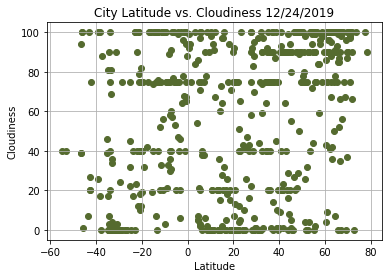

In [10]:
plt.scatter(weather["Lat"], weather["Cloudiness"], marker="o", color="darkolivegreen")
plt.title(f"City Latitude vs. Cloudiness {time.strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

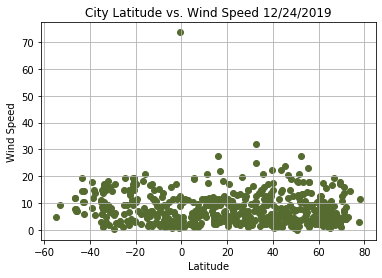

In [11]:
plt.scatter(weather["Lat"], weather["Windspeed"], marker="o", color="darkolivegreen")
plt.title(f"City Latitude vs. Wind Speed {time.strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude_vs_Wind_Speed.png")

# Show plot
plt.show()